In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,265.0,39.0,12,2.582276e-02,4.0,10.0,15.0,71.0,5.0,350.0,...,5.0,11.0,18.0,7.0,69.0,5.0,20.0,27.0,11.0,46.0
1,248.0,36.8,13,2.797466e-02,3.0,10.0,14.0,77.0,7.0,474.0,...,4.0,10.0,15.0,5.0,71.0,5.0,11.0,18.0,7.0,69.0
2,128.0,39.4,14,3.012655e-02,4.0,11.0,17.0,77.0,8.0,482.0,...,3.0,10.0,14.0,7.0,77.0,4.0,10.0,15.0,5.0,71.0
3,185.0,33.6,15,3.227844e-02,4.0,8.0,14.0,82.0,4.0,455.0,...,4.0,11.0,17.0,8.0,77.0,3.0,10.0,14.0,7.0,77.0
4,232.0,33.6,16,3.443033e-02,2.0,9.0,12.0,87.0,9.0,368.0,...,4.0,8.0,14.0,4.0,82.0,4.0,11.0,17.0,8.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17504,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17505,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17506,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [14]:
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]

In [15]:
x_train = x[5000:]
y_train = y[5000:]
x_test = x[:5000]
y_test = y[:5000]

In [16]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred = dt.predict(x_test)
y_pred

array([3., 2., 3., ..., 1., 1., 1.])

In [18]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = dt.score(x,y)
acc = dt.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9987123775786866 
 RMSE:  1.3532479447610477 
 Accuracy:  0.9924863769950191


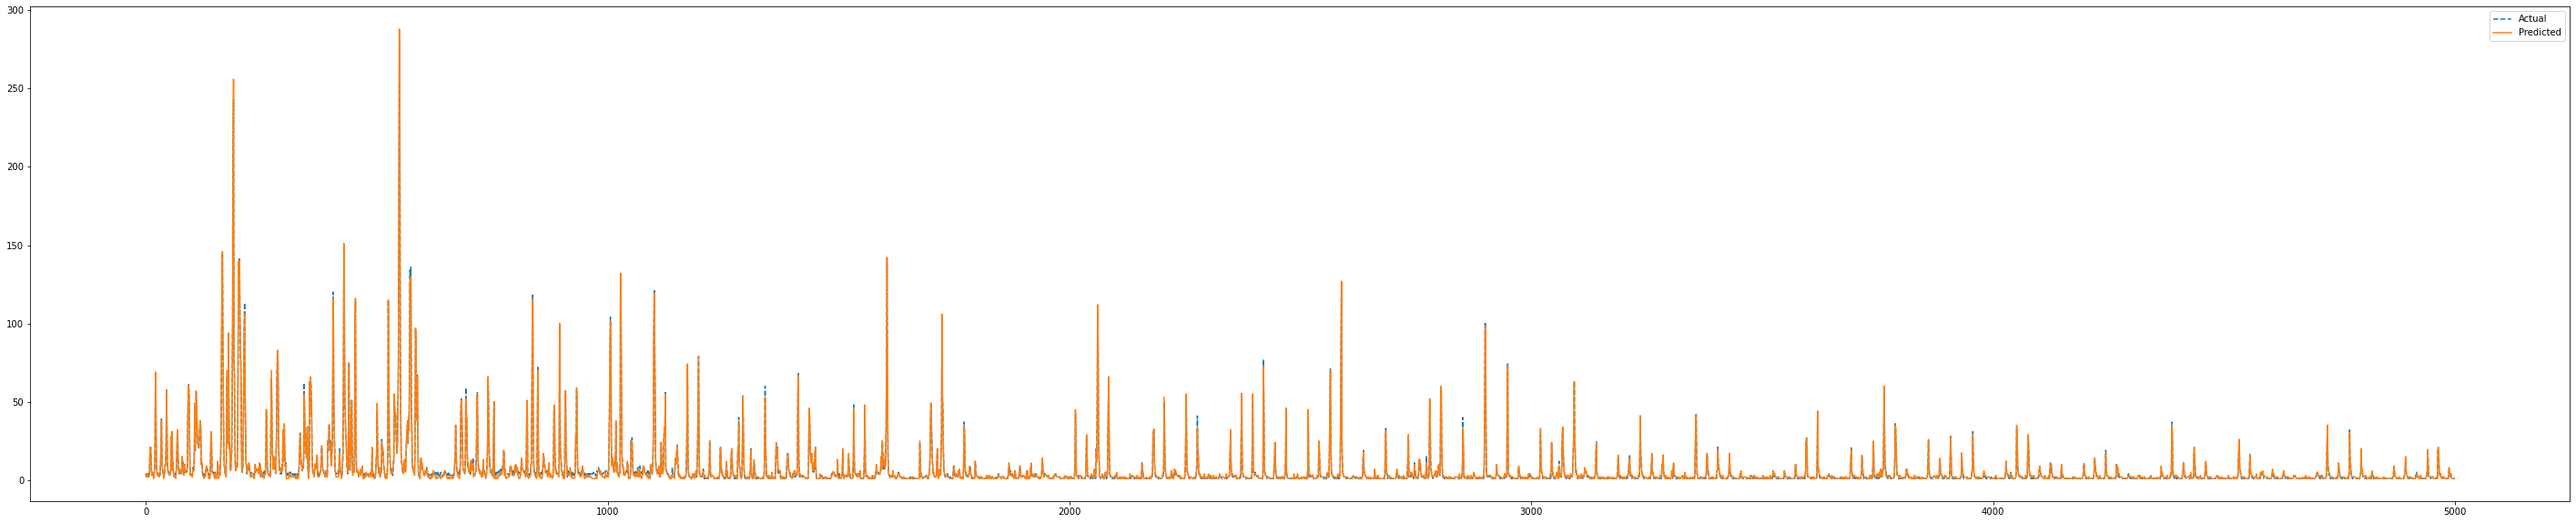

In [19]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

# alcan

In [20]:
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    dt.fit(x_train,y_train)  
    y_pred = dt.predict(x_test)
    importance = dt.feature_importances_
    for j,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = dt.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

Feature: 0, Score: 0.83649
Feature: 1, Score: 0.16266
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00011
Feature: 5, Score: 0.00010
Feature: 6, Score: 0.00008
Feature: 7, Score: 0.00012
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.00017
NOX (µg/m³N) 
 R-squared: 0.9994411789672681 
 RMSE:  1.9422955490861835
Feature: 0, Score: 0.97481
Feature: 1, Score: 0.01848
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00264
Feature: 4, Score: 0.00030
Feature: 5, Score: 0.00033
Feature: 6, Score: 0.00025
Feature: 7, Score: 0.00230
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00015
NO (µg/m³N) 
 R-squared: 0.9986887018861816 
 RMSE:  1.3656324542130653
Feature: 0, Score: 0.91931
Feature: 1, Score: 0.02458
Feature: 2, Score: 0.00029
Feature: 3, Score: 0.00293
Feature: 4, Score: 0.00141
Feature: 5, Score: 0.02306
Feature: 6, Score: 0.00113
Feature: 7, Sc

# aljorra

In [21]:
alc = pd.read_csv('al.csv')
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    dt.fit(x_train,y_train)  
    y_pred = dt.predict(x_test)
#     importance = dt.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = dt.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.9978931902601614 
 RMSE:  1.2580397450001333
NO (µg/m³N) 
 R-squared: 0.9628143961754813 
 RMSE:  1.6022708884580035
NO2 (µg/m³N) 
 R-squared: 0.993544915229635 
 RMSE:  1.4543122085714608
SO2 (µg/m³N) 
 R-squared: 0.07152033763615606 
 RMSE:  8.134285463395049
O3 (µg/m³N) 
 R-squared: 0.8562323727340818 
 RMSE:  17.337450562294332
PM10 (µg/m³N) 
 R-squared: 0.6511300488838699 
 RMSE:  20.792769127752077


# Time Series

# alcan

In [10]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    dt.fit(x_train,y_train)  
    y_pred = dt.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = dt.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.9130042022067492 
 RMSE:  24.234166129660828
NO (µg/m³N) 
 R-squared: 0.9125804107462536 
 RMSE:  11.150324120849582
NO2 (µg/m³N) 
 R-squared: 0.9049060039082922 
 RMSE:  10.042545095741419
SO2 (µg/m³N) 
 R-squared: 0.4430830949763077 
 RMSE:  1.9514507423965384
O3 (µg/m³N) 
 R-squared: 0.9633413204380625 
 RMSE:  12.40944704650453
PM10 (µg/m³N) 
 R-squared: 0.7587970341527805 
 RMSE:  13.619455495723756


# aljorra

In [11]:
alc = pd.read_csv('al.csv')
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    dt.fit(x_train,y_train)  
    y_pred = dt.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = dt.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.8165997164518871 
 RMSE:  11.737664844422847
NO (µg/m³N) 
 R-squared: 0.6973479175307433 
 RMSE:  4.57109614862781
NO2 (µg/m³N) 
 R-squared: 0.8858591595716205 
 RMSE:  6.115432936432219
SO2 (µg/m³N) 
 R-squared: 0.4386218644671498 
 RMSE:  6.325006245056206
O3 (µg/m³N) 
 R-squared: 0.9466150625526762 
 RMSE:  10.564867438827616
PM10 (µg/m³N) 
 R-squared: 0.7124277856523931 
 RMSE:  18.87791429157363
